In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import concurrent.futures

dataset_path = "/kaggle/input/face-mask-detection"
categories = ["with_mask", "without_mask"]
MASKED_PATH = "/kaggle/input/face-mask-detection/with_mask"
UNMASKED_PATH = "/kaggle/input/face-mask-detection/without_mask"

# Load the dataset

In [2]:
def process_image(args):
    img_path, label = args
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (128,128), interpolation=cv2.INTER_AREA)  # Faster resizing
        return img, label
    return None

def load_images():
    image_paths = []
    
    for label, category in enumerate(categories):
        folder_path = os.path.join(dataset_path, category)
        image_paths.extend([(os.path.join(folder_path, file), label) for file in os.listdir(folder_path)])

    X, y = [], []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(process_image, image_paths), total=len(image_paths), desc="Loading images"))

    # Filter out None values (failed reads)
    results = [res for res in results if res is not None]
    X, y = zip(*results)

    return np.array(X), np.array(y)

X, Y = load_images()

print(f"Total images loaded: {len(X)}")
print(f"Dataset shape: {X.shape}, Labels shape: {Y.shape}")

Loading images: 100%|██████████| 4095/4095 [00:06<00:00, 586.93it/s] 


Total images loaded: 4095
Dataset shape: (4095, 128, 128, 3), Labels shape: (4095,)


# Visualize each feature seperately

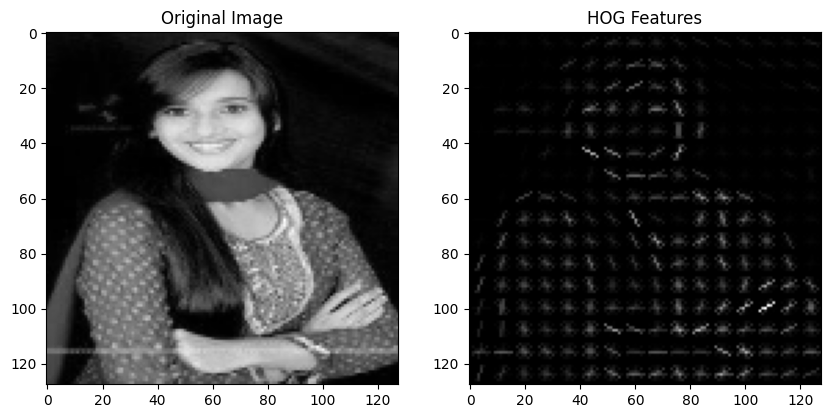

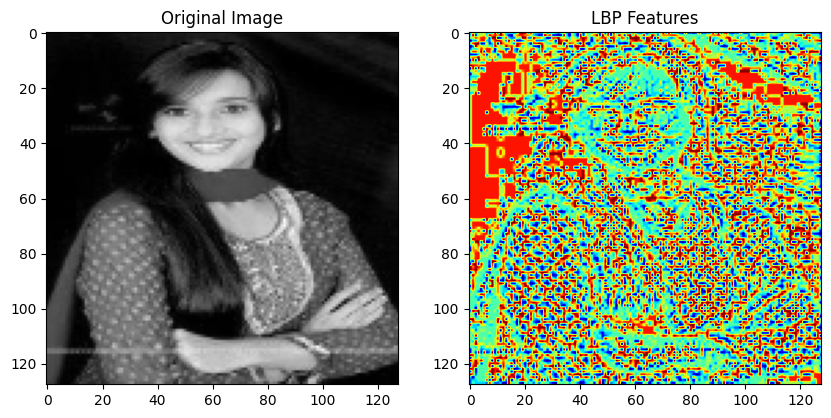

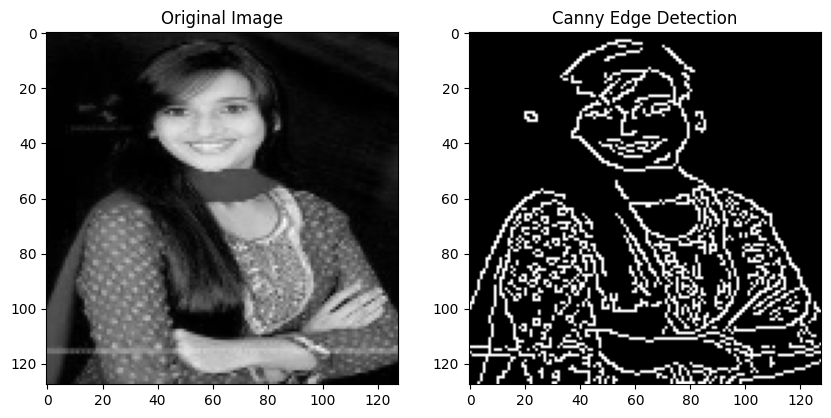

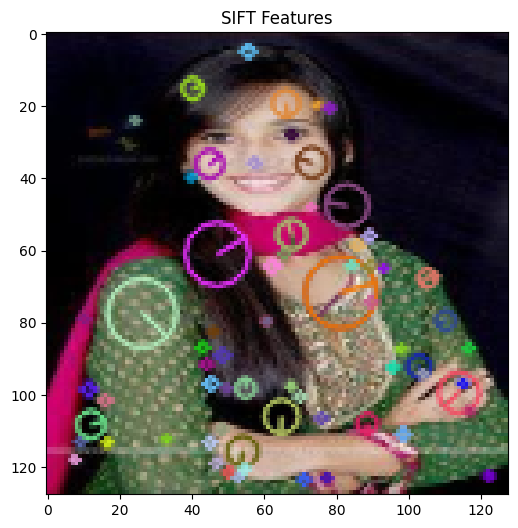

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern
from skimage.filters import gabor

def visualize_hog(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    features, hog_image = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Features")
    plt.show()

def visualize_lbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 8, 1, method="uniform")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(lbp, cmap='jet')
    plt.title("LBP Features")
    plt.show()

def visualize_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Image")
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.show()

def visualize_sift(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, _ = sift.detectAndCompute(gray, None)

    img_with_sift = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_with_sift, cv2.COLOR_BGR2RGB))
    plt.title("SIFT Features")
    plt.show()

def visualize_features(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))

    visualize_hog(image)
    visualize_lbp(image)
    visualize_edges(image)
    visualize_sift(image)

example_image_path = "/kaggle/input/face-mask-detection/without_mask/0.jpg"
visualize_features(example_image_path)


# Compute Accuracy using handcrafted features


Training classifiers with extract_hog features...


Extracting extract_hog: 100%|██████████| 4095/4095 [00:45<00:00, 89.54it/s]


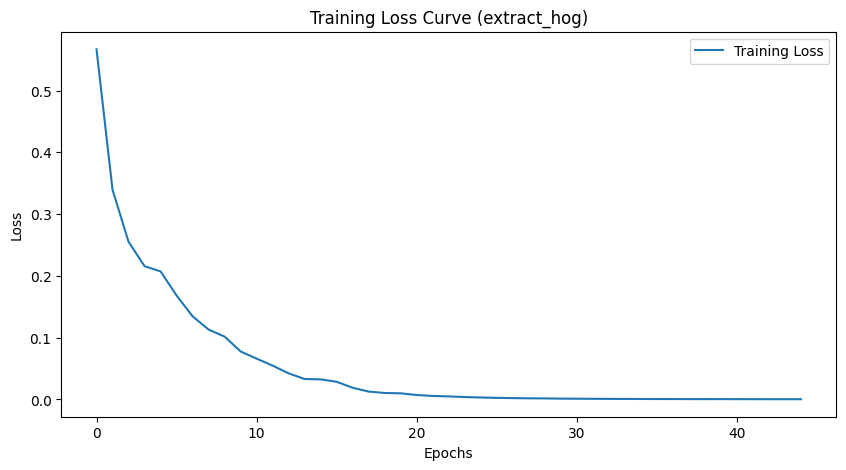

extract_hog Results:
SVM -> Accuracy: 89.99%, Precision: 0.88, Recall: 0.89
MLP -> Accuracy: 91.45%, Precision: 0.90, Recall: 0.91
SVM Confusion Matrix:
 [[410  43]
 [ 39 327]]
MLP Confusion Matrix:
 [[417  36]
 [ 34 332]]

Training classifiers with extract_lbp features...


Extracting extract_lbp: 100%|██████████| 4095/4095 [00:06<00:00, 588.62it/s]


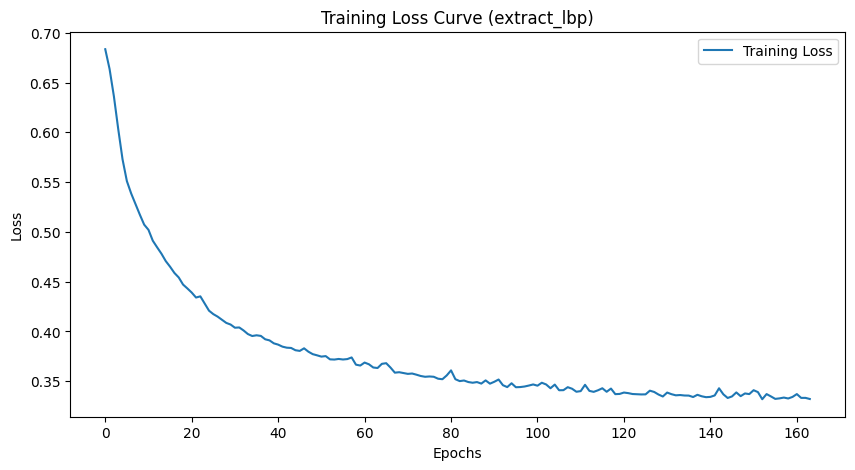

extract_lbp Results:
SVM -> Accuracy: 77.29%, Precision: 0.82, Recall: 0.63
MLP -> Accuracy: 83.88%, Precision: 0.89, Recall: 0.73
SVM Confusion Matrix:
 [[401  52]
 [134 232]]
MLP Confusion Matrix:
 [[419  34]
 [ 98 268]]

Training classifiers with extract_color_hist features...


Extracting extract_color_hist: 100%|██████████| 4095/4095 [00:00<00:00, 49866.37it/s]


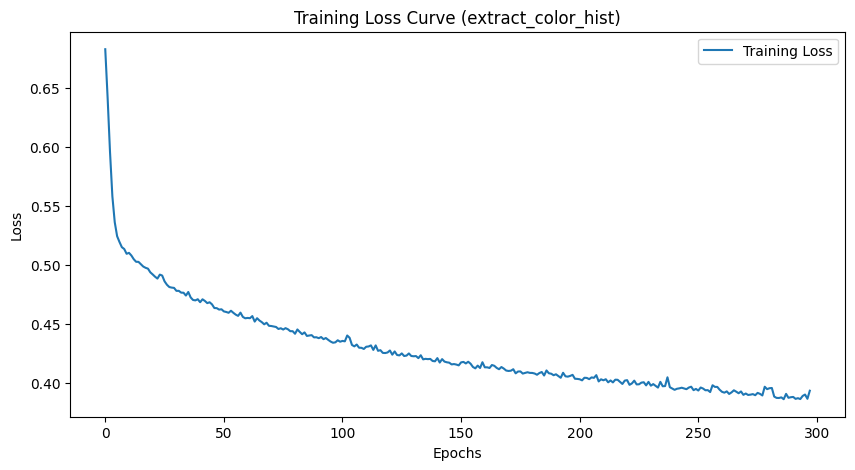

extract_color_hist Results:
SVM -> Accuracy: 74.36%, Precision: 0.68, Recall: 0.82
MLP -> Accuracy: 78.88%, Precision: 0.72, Recall: 0.86
SVM Confusion Matrix:
 [[309 144]
 [ 66 300]]
MLP Confusion Matrix:
 [[332 121]
 [ 52 314]]

Training classifiers with extract_edges features...


Extracting extract_edges: 100%|██████████| 4095/4095 [00:05<00:00, 684.90it/s]


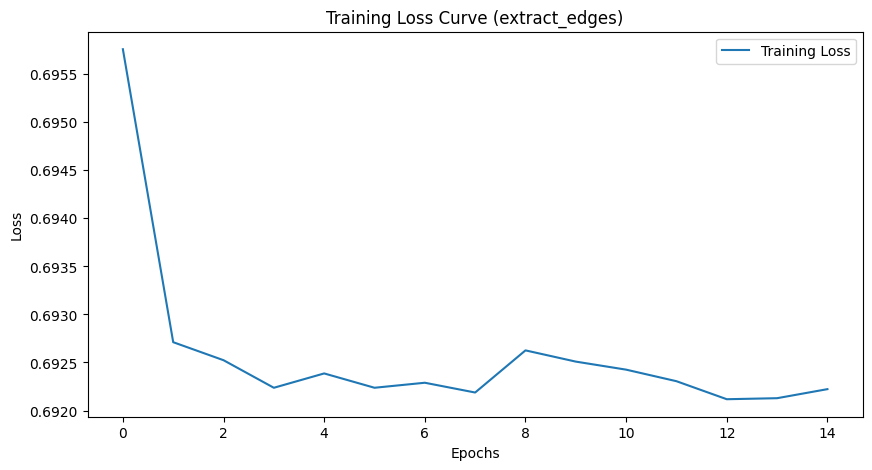

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


extract_edges Results:
SVM -> Accuracy: 55.31%, Precision: 0.00, Recall: 0.00
MLP -> Accuracy: 55.31%, Precision: 0.00, Recall: 0.00
SVM Confusion Matrix:
 [[453   0]
 [366   0]]
MLP Confusion Matrix:
 [[453   0]
 [366   0]]

Training classifiers with extract_sift_features features...


Extracting BoW for SIFT: 100%|██████████| 4095/4095 [00:19<00:00, 208.44it/s]


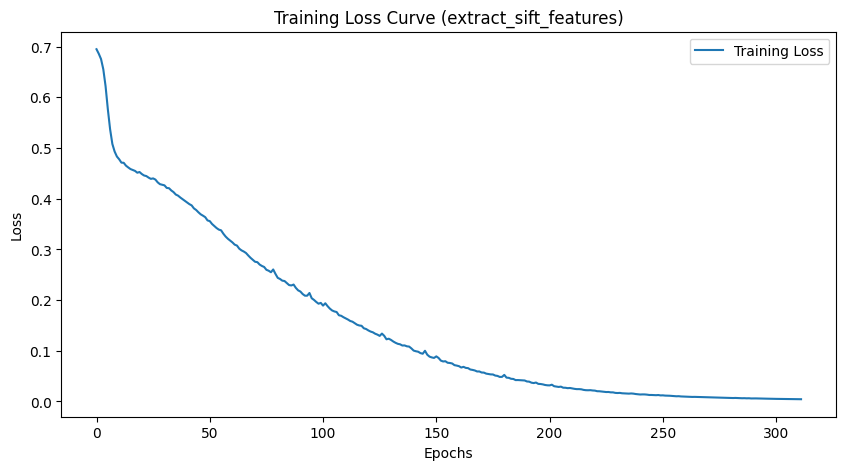

extract_sift_features Results:
SVM -> Accuracy: 75.34%, Precision: 0.78, Recall: 0.63
MLP -> Accuracy: 77.53%, Precision: 0.74, Recall: 0.78
SVM Confusion Matrix:
 [[386  67]
 [135 231]]
MLP Confusion Matrix:
 [[351 102]
 [ 82 284]]


In [4]:
import numpy as np
import concurrent.futures
from tqdm import tqdm
from skimage.feature import hog, local_binary_pattern
from skimage.filters import gabor
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

def extract_hog(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, block_norm='L2-Hys')

def extract_lbp(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 8, 1, method="uniform")
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)
    return lbp_hist  

def extract_color_hist(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist_hue = cv2.calcHist([hsv_image], [0], None, [16], [0, 256]).flatten()
    return hist_hue / hist_hue.sum()  

def extract_edges(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    return np.histogram(edges.ravel(), bins=16, range=(0, 256), density=True)[0]

def extract_sift_features(image, sift, kmeans=None):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    if des is None:
        return np.zeros((128,))  
    if kmeans is not None:
        labels = kmeans.predict(des)
        bow_vector = np.histogram(labels, bins=np.arange(0, kmeans.n_clusters+1), density=True)[0]
        return bow_vector
    return des  

def process_image(args):
    index, image, label, feature_extractor, use_sift, sift, kmeans = args

    if use_sift:
        features = extract_sift_features(image, sift, kmeans)
    else:
        features = feature_extractor(image)
    
    return features, label

def load_data(feature_extractor, X, Y, use_sift=False):
    image_data = list(enumerate(zip(X, Y)))  # Create index-based iterable
    
    if use_sift:
        sift = cv2.SIFT_create()
        all_descriptors = []
        with concurrent.futures.ThreadPoolExecutor() as executor:
            results = list(tqdm(executor.map(process_image, [(i, img, lbl, feature_extractor, use_sift, sift, None) for i, (img, lbl) in image_data]), 
                                total=len(image_data), desc="Extracting SIFT descriptors"))
        all_descriptors = [res[0] for res in results if res is not None]

        all_descriptors = np.vstack(all_descriptors)
        kmeans = KMeans(n_clusters=128, random_state=42, n_init=10)
        kmeans.fit(all_descriptors)

        with concurrent.futures.ThreadPoolExecutor() as executor:
            results = list(tqdm(executor.map(process_image, [(i, img, lbl, feature_extractor, use_sift, sift, kmeans) for i, (img, lbl) in image_data]), 
                                total=len(image_data), desc="Extracting BoW for SIFT")) 
    else:
        with concurrent.futures.ThreadPoolExecutor() as executor:
            results = list(tqdm(executor.map(process_image, [(i, img, lbl, feature_extractor, use_sift, None, None) for i, (img, lbl) in image_data]), 
                                total=len(image_data), desc=f"Extracting {feature_extractor.__name__}"))

    results = [res for res in results if res is not None]
    X_features, Y_labels = zip(*results)

    return np.array(X_features), np.array(Y_labels)

def train_and_evaluate(feature_extractor, X, Y, use_sift=False):
    print(f"\nTraining classifiers with {feature_extractor.__name__} features...")
    X_features, Y_labels = load_data(feature_extractor, X, Y, use_sift=use_sift)

    X_train, X_test, y_train, y_test = train_test_split(X_features, Y_labels, test_size=0.2, random_state=42)

    svm_model = SVC(kernel="linear")
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)

    mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=500, random_state=42)
    mlp_model.fit(X_train, y_train)
    y_pred_mlp = mlp_model.predict(X_test)

    loss_curve = mlp_model.loss_curve_

    plt.figure(figsize=(10, 5))
    plt.plot(loss_curve, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training Loss Curve ({feature_extractor.__name__})')
    plt.legend()
    plt.show()

    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    precision_svm = precision_score(y_test, y_pred_svm)
    recall_svm = recall_score(y_test, y_pred_svm)
    cm_svm = confusion_matrix(y_test, y_pred_svm)

    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
    precision_mlp = precision_score(y_test, y_pred_mlp)
    recall_mlp = recall_score(y_test, y_pred_mlp)
    cm_mlp = confusion_matrix(y_test, y_pred_mlp)

    print(f"{feature_extractor.__name__} Results:")
    print(f"SVM -> Accuracy: {accuracy_svm * 100:.2f}%, Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f}")
    print(f"MLP -> Accuracy: {accuracy_mlp * 100:.2f}%, Precision: {precision_mlp:.2f}, Recall: {recall_mlp:.2f}")
    print("SVM Confusion Matrix:\n", cm_svm)
    print("MLP Confusion Matrix:\n", cm_mlp)

train_and_evaluate(extract_hog, X, Y)         # HOG
train_and_evaluate(extract_lbp, X, Y)         # LBP
train_and_evaluate(extract_color_hist, X, Y)  # Color Histogram
train_and_evaluate(extract_edges, X, Y)       # Canny Edge
train_and_evaluate(extract_sift_features, X, Y, use_sift=True)  # SIFT


# Build CNN for classification

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        # Flatten to 1D vector
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Reduce overfitting
        Dense(2, activation='softmax')  # 2 output classes (with_mask, without_mask)
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

    return model

cnn_model = build_cnn()
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X, Y, test_size=0.2, random_state=42)

# X_train_cnn = X_train_cnn.reshape(-1, 128, 128, 3)
# X_test_cnn = X_test_cnn.reshape(-1, 128, 128, 3)

print("New X_train shape:", X_train_cnn.shape)  # Should be (num_samples, 128, 128, 3)
print("New X_test shape:", X_test_cnn.shape)    # Should be (num_samples, 128, 128, 3)


New X_train shape: (3276, 128, 128, 3)
New X_test shape: (819, 128, 128, 3)


In [7]:
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 58s 541ms/step - accuracy: 0.7699 - loss: 11.2073 - val_accuracy: 0.9084 - val_loss: 0.2581
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 58s 559ms/step - accuracy: 0.9291 - loss: 0.2270 - val_accuracy: 0.8681 - val_loss: 0.3234
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 58s 563ms/step - accuracy: 0.9277 - loss: 0.2124 - val_accuracy: 0.9023 - val_loss: 0.2639
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 57s 550ms/step - accuracy: 0.9147 - loss: 0.2210 - val_accuracy: 0.9341 - val_loss: 0.1695
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 56s 545ms/step - accuracy: 0.9377 - loss: 0.1604 - val_accuracy: 0.9402 - val_loss: 0.1560
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 83s 555ms/step - accuracy: 0.9436 - loss: 0.1478 - val_accuracy: 0.9328 - val_loss: 0.2074
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 56s 544ms/step - accuracy: 0.9505 - loss: 0.1144 - val_accuracy: 0.9267 - val_loss: 0.2147
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 55s 538ms/step - accuracy: 0.9617 - loss: 

In [8]:
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 151ms/step - accuracy: 0.9153 - loss: 0.2143
Test Accuracy: 92.31%


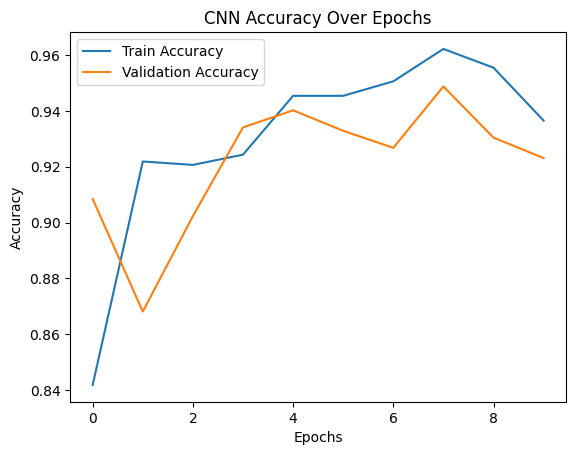

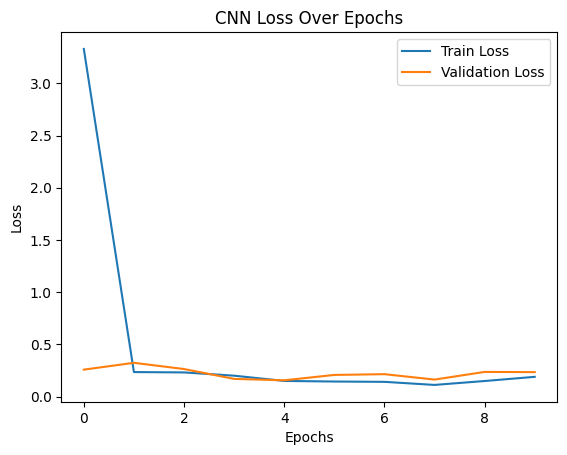

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss Over Epochs')
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_cnn():
    model = Sequential([
        Conv2D(64, (3,3), activation='relu', input_shape=(128,128,3)),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(256, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        # Flatten to 1D vector
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')  # 2 output classes (with_mask, without_mask)
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

    return model

# Create CNN model
cnn_model = build_cnn()
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,249,282 (50.54 MB)

 Trainable params: 13,249,282 (50.54 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.6642 - loss: 11.9394 - val_accuracy: 0.8694 - val_loss: 0.3652
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 173s 2s/step - accuracy: 0.7320 - loss: 0.5549 - val_accuracy: 0.8144 - val_loss: 0.4479
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8396 - loss: 0.4184 - val_accuracy: 0.8608 - val_loss: 0.3151
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8636 - loss: 0.3796 - val_accuracy: 0.8913 - val_loss: 0.2975
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.8121 - loss: 0.4696 - val_accuracy: 0.7912 - val_loss: 0.4041
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.8833 - loss: 0.3574 - val_accuracy: 0.9084 - val_loss: 0.2358
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.9137 - loss: 0.2485 - val_accuracy: 0.8779 - val_loss: 0.4779
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.9159 - loss: 0.2364 - val_acc

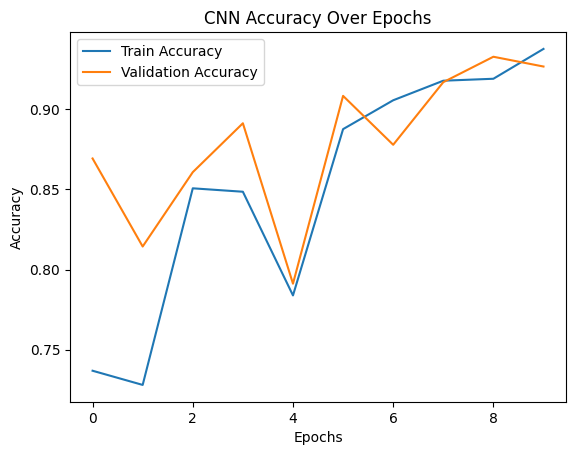

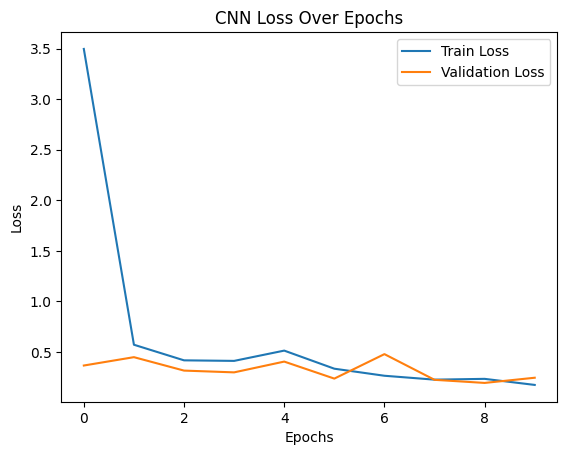

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy Over Epochs')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss Over Epochs')
plt.show()
